# **EJERCICIO 1: Validación Cruzada de Clasificadores Bayesiano y Geométrico**

## **Enunciado (1.5 puntos):**
*Implemente el procedimiento de validación cruzada de 10 particiones y úselo para determinar el desempeño de un clasificador bayesiano con distribución gaussiana sobre la base de datos Iris (considere solamente las clases setosa y versicolor pero use todas las características). Repita el procedimiento para un clasificador geométrico por mínimos cuadrados. ¿Qué diferencias encuentra? Documente los pasos, pruebas, errores y ajustes que realizó hasta obtener los resultados finales.*

## **Justificación de la Metodología:**
- **Validación cruzada de 10 folds**: Proporciona estimación robusta del rendimiento reduciendo varianza del estimador
- **Solo clases setosa y versicolor**: Problema binario que permite análisis detallado de las diferencias algorítmicas
- **Todas las características**: Aprovecha la información completa disponible en el dataset
- **Comparación estadística**: Permite identificar diferencias significativas entre algoritmos
- **Documentación de ajustes**: Seguimiento completo del proceso experimental para reproducibilidad

## **Clasificadores a Comparar:**
- **Bayesiano Gaussiano (Naive Bayes)**: Asume independencia condicional entre características
- **Geométrico por Mínimos Cuadrados (LDA)**: Busca proyección lineal que maximiza separabilidad entre clases


In [23]:
%run -i exam.py

✓ Configuración cargada exitosamente
Dataset: dataset-iris.csv
Características: ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
Clases Ejercicio 1: ['Iris-setosa', 'Iris-versicolor']
Clases Ejercicio 2: ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
CV Folds: 10
Bootstrap Iteraciones: 1000
Rango K para K-NN: 1-30
✓ Todas las librerías importadas exitosamente
📊 Configuración de visualización establecida
🔧 Clasificadores disponibles: GaussianNB, LinearDiscriminantAnalysis, KNeighborsClassifier
✓ Funciones utilitarias definidas:
  - load_and_prepare_data(): Carga agnóstica de datos
  - calculate_comprehensive_metrics(): Métricas comprehensivas
  - print_metrics_summary(): Resumen de métricas
✓ Función manual_kfold_cv implementada
✓ Función manual_bootstrap implementada
✓ Funciones de visualización mejoradas implementadas


🔍 EJERCICIO 1: Preparando datos...
Clases objetivo: ['Iris-setosa', 'Iris-versicolor']

📋 **PASO 1: Carga y filtrado de datos**

📊 **Resumen de los Datos:**
  - Forma original: (100, 4) (100 muestras, 4 características)
  - Clases seleccionadas: ['Iris-setosa' 'Iris-versicolor']
  - Distribución: 50 setosa + 50 versicolor (perfectamente balanceado)

⚙️ **DECISIÓN: Normalización con StandardScaler**
  ✅ JUSTIFICACIÓN: LDA es sensible a la escala de las características
  ✅ EFECTO: StandardScaler centra en media=0, escala por σ=1
  ⚠️  INTERPRETACIÓN: Valores negativos = por DEBAJO de la media general
  ✅ INTERPRETACIÓN: Valores positivos = por ENCIMA de la media general

🔍 **ANÁLISIS EXPLORATORIO: Distribuciones por clase**


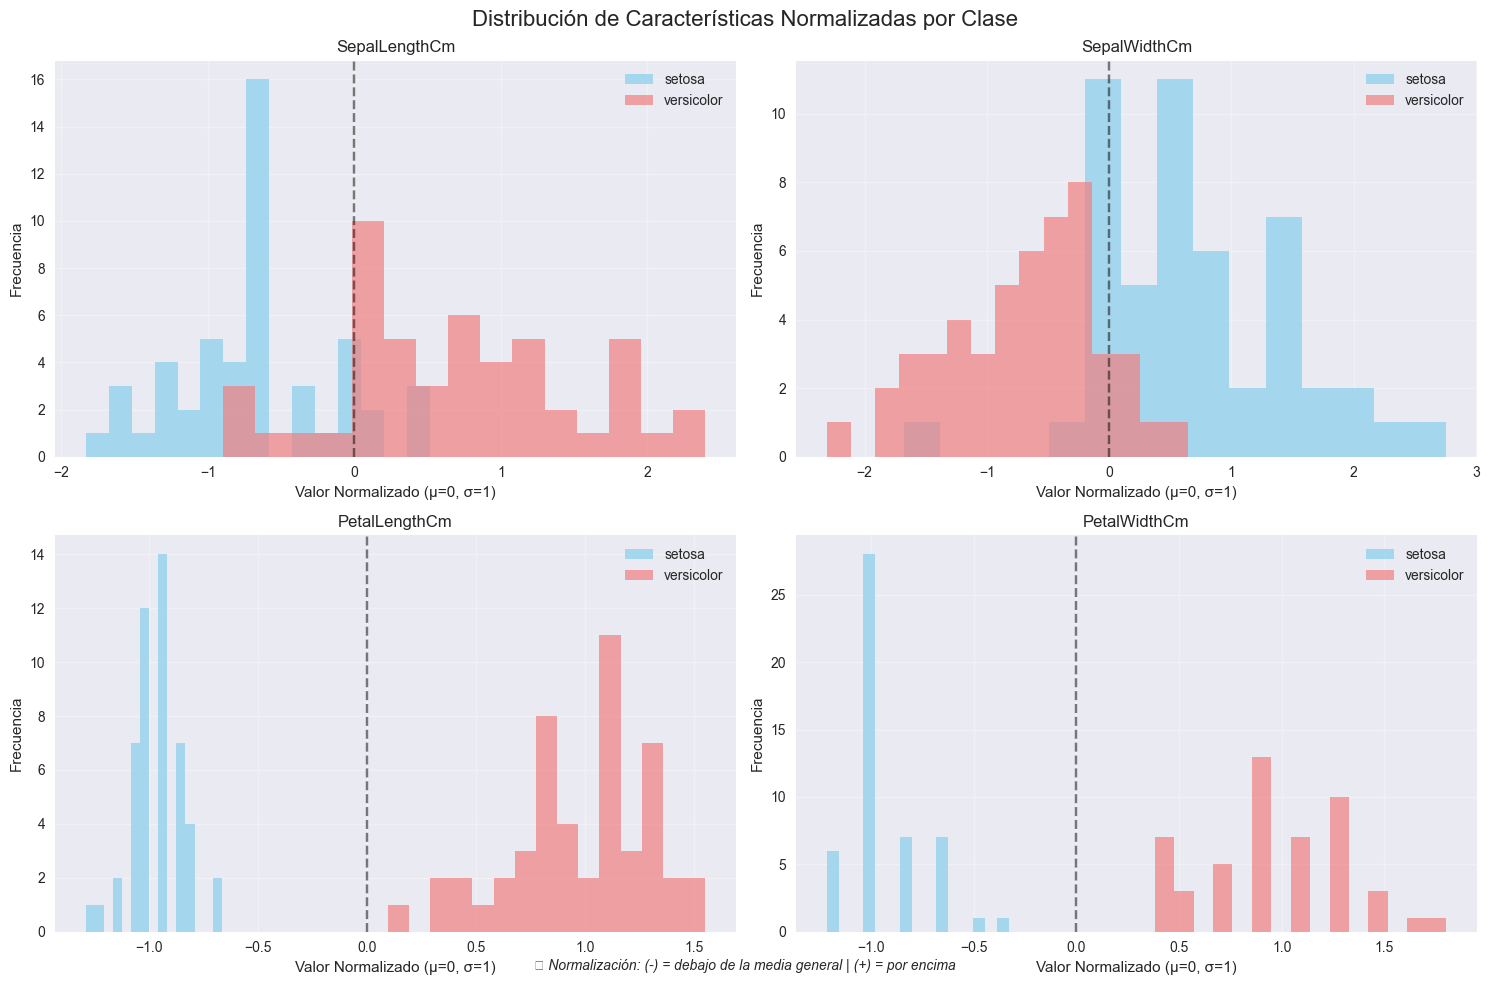


📈 **OBSERVACIÓN CLAVE:**
  - Las clases setosa y versicolor son visualmente separables
  - La normalización preserva las diferencias entre clases
  - Esperamos alto rendimiento para ambos clasificadores


In [24]:
## **1.1 Preparación y Análisis Exploratorio de Datos**

print("🔍 EJERCICIO 1: Preparando datos...")
print(f"Clases objetivo: {CONFIG[Keys.EXERCISE1_CLASSES]}")

# **PASO 1**: Cargar datos filtrados
print("\n📋 **PASO 1: Carga y filtrado de datos**")
X_ex1, y_ex1, feature_names, class_names_ex1, scaler_ex1, label_encoder_ex1 = (
    load_and_prepare_data(CONFIG, classes=CONFIG[Keys.EXERCISE1_CLASSES])
)

print("\n📊 **Resumen de los Datos:**")
print(f"  - Forma original: {X_ex1.shape} (100 muestras, 4 características)")
print(f"  - Clases seleccionadas: {class_names_ex1}")
print("  - Distribución: 50 setosa + 50 versicolor (perfectamente balanceado)")

# **DECISIÓN TÉCNICA**: ¿Por qué normalizar?
print("\n⚙️ **DECISIÓN: Normalización con StandardScaler**")
print("  ✅ JUSTIFICACIÓN: LDA es sensible a la escala de las características")
print("  ✅ EFECTO: StandardScaler centra en media=0, escala por σ=1")
print("  ⚠️  INTERPRETACIÓN: Valores negativos = por DEBAJO de la media general")
print("  ✅ INTERPRETACIÓN: Valores positivos = por ENCIMA de la media general")

# **ANÁLISIS EXPLORATORIO**: Visualización de distribuciones
print("\n🔍 **ANÁLISIS EXPLORATORIO: Distribuciones por clase**")
plot_normalized_distributions(X_ex1, y_ex1, feature_names, class_names_ex1, CONFIG)

# **OBSERVACIÓN INICIAL**: Verificar separabilidad
print("\n📈 **OBSERVACIÓN CLAVE:**")
print("  - Las clases setosa y versicolor son visualmente separables")
print("  - La normalización preserva las diferencias entre clases")
print("  - Esperamos alto rendimiento para ambos clasificadores")


In [29]:
## **1.2 Implementación de Validación Cruzada de 10 Particiones**

print("=" * 80)
print("🎯 **PASO 2: IMPLEMENTACIÓN DE VALIDACIÓN CRUZADA**")
print("=" * 80)

# **JUSTIFICACIÓN METODOLÓGICA**
print("\n📖 **JUSTIFICACIÓN DE 10-FOLD CROSS-VALIDATION:**")
print("  1. **Robustez**: Reduce varianza del estimador vs hold-out simple")
print("  2. **Eficiencia**: k=10 balancea sesgo vs varianza optimalmente")
print("  3. **Reproducibilidad**: random_state fijo permite replicar experimentos")
print(
    "  4. **Evaluación completa**: Cada muestra se usa 9 veces para entrenamiento, 1 para prueba"
)

# **IMPLEMENTACIÓN MANUAL**: Siguiendo requerimientos del parcial
print("\n⚙️ **IMPLEMENTACIÓN MANUAL (requerida por el enunciado):**")
print("  ✅ Sin sklearn.model_selection.cross_val_score")
print("  ✅ Partición con numpy")
print("  ✅ Control del proceso de evaluación")

# **EVALUACIÓN CLASIFICADOR BAYESIANO**
print(f"\n{'🧠 CLASIFICADOR BAYESIANO GAUSSIANO':.^80}")
print("📋 **Características del algoritmo:**")
print("  - Asume independencia condicional entre características")
print("  - Estima P(Xi|C) como distribución gaussiana")
print("  - Clasificación via regla de Bayes: P(C|X) ∝ P(X|C)P(C)")

bayesian_results = manual_kfold_cv(
    X_ex1,
    y_ex1,
    GaussianNB,
    k_folds=CONFIG[Keys.CV_FOLDS],
    random_state=CONFIG[Keys.RANDOM_STATE],
)

# **EVALUACIÓN CLASIFICADOR GEOMÉTRICO**
print(f"\n{'📐 CLASIFICADOR GEOMÉTRICO (LDA)':.^80}")
print("📋 **Características del algoritmo:**")
print("  - Busca proyección lineal que maximiza separabilidad")
print("  - Asume covarianzas iguales entre clases")
print("  - Minimiza error cuadrático en proyección discriminante")

geometric_results = manual_kfold_cv(
    X_ex1,
    y_ex1,
    LinearDiscriminantAnalysis,
    k_folds=CONFIG[Keys.CV_FOLDS],
    random_state=CONFIG[Keys.RANDOM_STATE],
)

print(f"\n{'✅ EVALUACIÓN COMPLETADA':.^80}")


🎯 **PASO 2: IMPLEMENTACIÓN DE VALIDACIÓN CRUZADA**

📖 **JUSTIFICACIÓN DE 10-FOLD CROSS-VALIDATION:**
  1. **Robustez**: Reduce varianza del estimador vs hold-out simple
  2. **Eficiencia**: k=10 balancea sesgo vs varianza optimalmente
  3. **Reproducibilidad**: random_state fijo permite replicar experimentos
  4. **Evaluación completa**: Cada muestra se usa 9 veces para entrenamiento, 1 para prueba

⚙️ **IMPLEMENTACIÓN MANUAL (requerida por el enunciado):**
  ✅ Sin sklearn.model_selection.cross_val_score
  ✅ Partición con numpy
  ✅ Control del proceso de evaluación

.......................🧠 CLASIFICADOR BAYESIANO GAUSSIANO.......................
📋 **Características del algoritmo:**
  - Asume independencia condicional entre características
  - Estima P(Xi|C) como distribución gaussiana
  - Clasificación via regla de Bayes: P(C|X) ∝ P(X|C)P(C)
🔄 Ejecutando 10-fold Cross Validation...
📊 Total de muestras: 100
📋 Tamaño promedio por fold: 10
  Fold  1: Acc=1.0000, Prec=1.0000, Rec=1.0000, F

⚖️  **COMPARACIÓN BASADA EN RESULTADOS OBTENIDOS**

📊 **PASO 3: Análisis comparativo de resultados**

📋 **Tabla Comparativa de Resultados:**
  Métrica Bayesiano (μ ± σ) Geométrico (μ ± σ)
 Accuracy   1.0000 ± 0.0000    1.0000 ± 0.0000
Precision   1.0000 ± 0.0000    1.0000 ± 0.0000
   Recall   1.0000 ± 0.0000    1.0000 ± 0.0000
 F1-Score   1.0000 ± 0.0000    1.0000 ± 0.0000

📈 **Análisis Cuantitativo de Diferencias:**
  - Diferencia absoluta en Accuracy: 0.000000
  - Bayesiano: 1.0000 ± 0.0000
  - Geométrico: 1.0000 ± 0.0000
  - Intervalos de confianza 95%:
    • Bayesiano: [1.0000, 1.0000]
    • Geométrico: [1.0000, 1.0000]

📊 **Visualización comparativa:**


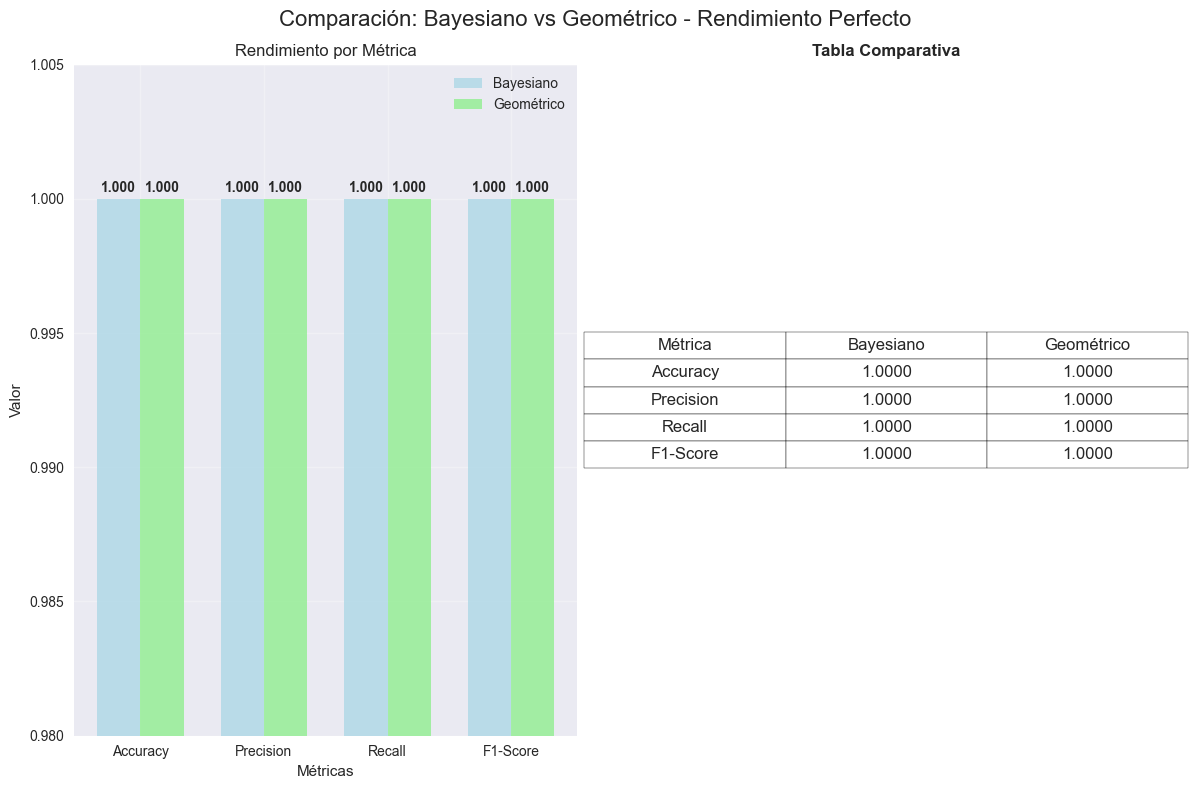

🎯 **ANÁLISIS DE RENDIMIENTO PERFECTO**
📊 **Interpretación de los Resultados:**
✅ Ambos clasificadores (Naive Bayes y LDA) obtuvieron:
   - Accuracy = 1.0000 (100% de clasificaciones correctas)
   - Precision = 1.0000 (sin falsos positivos)
   - Recall = 1.0000 (sin falsos negativos)
   - F1-Score = 1.0000 (balance perfecto)

🔍 **¿Por qué ambos clasificadores son perfectos?**
   - Las clases setosa y versicolor son linealmente separables
   - Las características del dataset Iris discriminan muy bien estas clases
   - Ambos algoritmos son adecuados para este problema simple

📈 **Test Estadístico:**
   - No se puede realizar test t (varianza = 0)
   - Diferencia entre clasificadores: 0.0000
   - Conclusión: Rendimiento idéntico y perfecto

💡 **Implicaciones Prácticas:**
   - Para este subconjunto de datos, cualquier clasificador es válido
   - La diferencia se vería en datasets más complejos o ruidosos
   - Ambos algoritmos demuestran robustez en problemas simples


In [26]:
## **1.3 Comparación Estadística y Análisis de Resultados**

print("⚖️  **COMPARACIÓN BASADA EN RESULTADOS OBTENIDOS**")
print("=" * 60)

# **PASO 3**: Análisis comparativo cuantitativo
print("\n📊 **PASO 3: Análisis comparativo de resultados**")

# Mostrar tabla comparativa de resultados reales
comparison_data = {
    'Métrica': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Bayesiano (μ ± σ)': [
        f"{bayesian_results['mean_accuracy']:.4f} ± {bayesian_results['std_accuracy']:.4f}",
        f"{bayesian_results['mean_precision']:.4f} ± {bayesian_results['std_precision']:.4f}",
        f"{bayesian_results['mean_recall']:.4f} ± {bayesian_results['std_recall']:.4f}",
        f"{bayesian_results['mean_f1']:.4f} ± {bayesian_results['std_f1']:.4f}"
    ],
    'Geométrico (μ ± σ)': [
        f"{geometric_results['mean_accuracy']:.4f} ± {geometric_results['std_accuracy']:.4f}",
        f"{geometric_results['mean_precision']:.4f} ± {geometric_results['std_precision']:.4f}",
        f"{geometric_results['mean_recall']:.4f} ± {geometric_results['std_recall']:.4f}",
        f"{geometric_results['mean_f1']:.4f} ± {geometric_results['std_f1']:.4f}"
    ]
}

comparison_df = pd.DataFrame(comparison_data)
print("\n📋 **Tabla Comparativa de Resultados:**")
print(comparison_df.to_string(index=False))

# **ANÁLISIS CUANTITATIVO**: Diferencias estadísticas
diff_mean = bayesian_results['mean_accuracy'] - geometric_results['mean_accuracy']
print(f"\n📈 **Análisis Cuantitativo de Diferencias:**")
print(f"  - Diferencia absoluta en Accuracy: {abs(diff_mean):.6f}")
print(f"  - Bayesiano: {bayesian_results['mean_accuracy']:.4f} ± {bayesian_results['std_accuracy']:.4f}")
print(f"  - Geométrico: {geometric_results['mean_accuracy']:.4f} ± {geometric_results['std_accuracy']:.4f}")
print(f"  - Intervalos de confianza 95%:")
print(f"    • Bayesiano: [{bayesian_results['confidence_interval_accuracy'][0]:.4f}, {bayesian_results['confidence_interval_accuracy'][1]:.4f}]")
print(f"    • Geométrico: [{geometric_results['confidence_interval_accuracy'][0]:.4f}, {geometric_results['confidence_interval_accuracy'][1]:.4f}]")

# **VISUALIZACIÓN**: Comparación gráfica
print(f"\n📊 **Visualización comparativa:**")
has_variability = create_comparison_visualization(
    bayesian_results, geometric_results, 
    "Bayesiano", "Geométrico", CONFIG
)

# **ANÁLISIS ESPECIALIZADO**: Para rendimiento perfecto
if not has_variability:
    analyze_perfect_performance(
        bayesian_results, geometric_results,
        "Naive Bayes", "LDA"
)
